An example of application of the 3 modules of the k segments python module

Example of the PC extraction with the ksegments, this code shows the variation of the number of segments

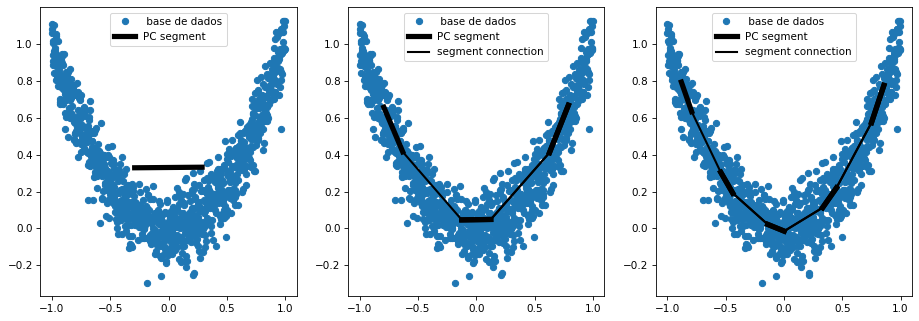

In [2]:
from ocpc_py import *
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

df = sio.loadmat('flame_data.mat')
df_x = df['X']
df_y = df['y']
X = np.concatenate((df_x, df_y), axis = 1)

x = X[0:1000, 0:2]

fig, ax = plt.subplots(figsize = (15, 5), ncols=3, nrows=1,   dpi = 75)

cp0 = Kseg(1, 1, 1, 1000)
cp0.fitCurve(x)
ax[0].plot(x[:,0], x[:,1], 'o', label = ' base de dados')
cp0.plot_curve(ax[0])
ax[0].legend()

cp1 = Kseg(3, 1, 1, 1000)
cp1.fitCurve(x)
ax[1].plot(x[:,0], x[:,1], 'o', label = ' base de dados')
cp1.plot_curve(ax[1])
ax[1].legend()

cp2 = Kseg(5, 1, 1, 1000)
cp2.fitCurve(x)
ax[2].plot(x[:,0], x[:,1], 'o', label = ' base de dados')
cp2.plot_curve(ax[2])
ax[2].legend()

This example shows the one-class classifier, using the inlier class output as 1 and the outlier output as -1 

In [3]:
y = X[:,2]
X = X[:,0:2]

c0_x = X[y == 1]
c1_x = X[y == -1]

c0_y = y[y==1]
c1_y = y[y==-1]


oc_clf = OneClassPC(10, 1, 1, 0.05, 1000)
oc_clf.fit(c0_x)
y0_p = oc_clf.predict(c0_x)
y1_p = oc_clf.predict(c1_x)

y_true = np.concatenate((c0_y, c1_y), axis = 0) 
y_pred = np.concatenate((y0_p, y1_p), axis = 0)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.9520319786808794


Example of multiclass version of the classifier. In this version, a classifier can be fitted with N classes, creating N curves using the approach one x rest multiclass classification.

0.9586942038640907


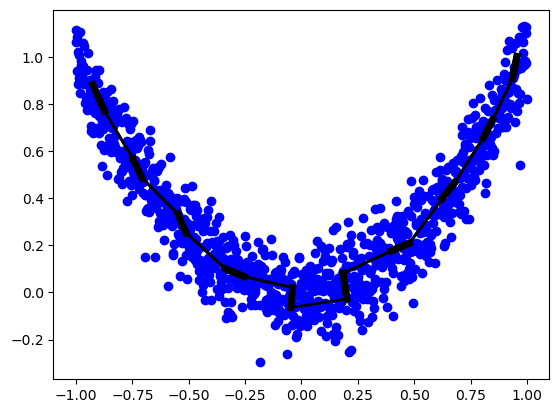

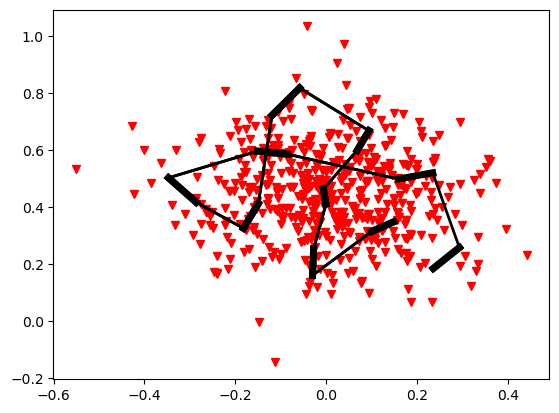

In [5]:
y = np.zeros((X.shape[0],2))
y[0:1001, 0] = 1
y[1001:, 1]  = 1
mc_clf = MultiClassPC(10, 1, 1, 1000)
mc_clf.fit(X, y)
yp = mc_clf.predict(X)

aa = mc_clf.curves
c1 = aa[0]
c2 = aa[1]


fig,ax = plt.subplots()
ax.plot(c0_x[:,0], c0_x[:,1], 'bo')
c1.plot_curve(ax)

fig,ax = plt.subplots()
ax.plot(c1_x[:,0], c1_x[:,1], 'rv')
c2.plot_curve(ax)

print(mc_clf.score(y, yp))